In [241]:
#!pip3 install sklearn

In [242]:
#Importing Pacakages
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [243]:
#Importing Datasets
train = pd.read_csv("Simulated_Data_Train.csv")
test = pd.read_csv("Simulated_Data_Test.csv")
validation = pd.read_csv("Simulated_Data_Validation.csv")

In [244]:
train.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.0,0.0,0.365902,0.475594,0.410504,NaN,0.0,69000.0,AL,0.0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,1.0,0.0,0.542786,0.543158,0.535147,0.587351,0.0,61000.0,FL,0.0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,...,0.0,1.0,0.323678,0.321776,0.348713,0.413293,0.0,NaN,AL,0.0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,1.0,0.0,0.448721,0.422809,0.491365,0.466810,0.0,79000.0,SC,1.0
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.644030,0.619987,0.546655,0.588442,1.0,NaN,LA,0.0


In [245]:
test.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,40477.81,7766.64,322.0,181.0,235.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.588301,0.711887,0.538456,0.633699,0.0,26000.0,FL,0.0
1,106760.98,16606.98,323.0,144.0,273.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.707799,0.739732,0.562194,0.746901,1.0,47000.0,AL,0.0
2,121428.34,13910.13,361.0,189.0,350.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.479711,0.434104,0.374705,0.458438,0.0,71000.0,MS,0.0
3,96515.05,15436.78,344.0,203.0,343.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.443710,0.474768,0.372028,0.582352,1.0,68000.0,AL,0.0
4,123760.22,14213.25,370.0,177.0,347.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.571004,0.472634,0.605137,0.577697,0.0,76000.0,GA,0.0


In [246]:
validation.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,63651.27,9019.99,484.0,242.0,395.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.619761,0.624652,0.506910,0.530109,0.0,66000.0,FL,1.0
1,105559.29,16692.19,212.0,118.0,211.0,0.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.428082,0.533489,0.340476,0.388792,0.0,55000.0,MS,0.0
2,96062.99,10509.13,255.0,123.0,180.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.437217,0.422643,0.418459,0.450523,0.0,86000.0,MS,0.0
3,84417.40,13873.96,330.0,175.0,328.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.651360,0.566563,0.399319,0.562153,0.0,110000.0,MS,0.0
4,100623.91,15592.09,207.0,101.0,128.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.586265,0.504849,0.652576,0.576409,1.0,NaN,NC,0.0


# Preprocessing the data (Data Manipulation)

In [247]:
#Check NA values
print("\nNull Values in Training Data: \n", train.isnull().sum())
print("\nNull Values in Testing Data: \n", test.isnull().sum())
print("\nNull Values in Validation Data: \n", validation.isnull().sum())




Null Values in Training Data: 
 tot_credit_debt                          0
avg_card_debt                            0
credit_age                               0
credit_good_age                          0
card_age                                 0
non_mtg_acc_past_due_12_months_num       0
non_mtg_acc_past_due_6_months_num        0
mortgages_past_due_6_months_num          0
credit_past_due_amount                   0
inq_12_month_num                         0
card_inq_24_month_num                    0
card_open_36_month_num                   0
auto_open_ 36_month_num                  0
uti_card                                 0
uti_50plus_pct                           0
uti_max_credit_line                      0
uti_card_50plus_pct                   2055
ind_acc_XYZ                              0
rep_income                            1570
States                                   0
Default_ind                              0
dtype: int64

Null Values in Testing Data: 
 tot_credit_debt    

<AxesSubplot:>

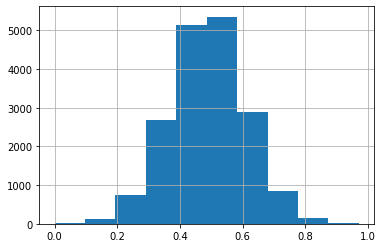

In [248]:
train['uti_card_50plus_pct'].hist()

In [249]:
print("Since it is normally distributed, we can replace the null values with means values of the column")

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(train[['uti_card_50plus_pct']])
train['uti_card_50plus_pct'] = imputer.transform(train[['uti_card_50plus_pct']])

print(f"Now we have {train['uti_card_50plus_pct'].isnull().sum()} null values from this column :)")

Since it is normally distributed, we can replace the null values with means values of the column
Now we have 0 null values from this column :)


In [250]:
train.dropna(axis=0, how='any', inplace=True)

In [251]:
test.dropna(axis=0, how='any', inplace=True)

In [252]:
validation.dropna(axis=0, how='any', inplace=True)

In [253]:
#Check NA values Again

In [254]:

print("\nNull Values in Training Data: \n", train.isnull().sum())
print("\nNull Values in Testing Data: \n", test.isnull().sum())
print("\nNull Values in Validation Data: \n", validation.isnull().sum())


Null Values in Training Data: 
 tot_credit_debt                       0
avg_card_debt                         0
credit_age                            0
credit_good_age                       0
card_age                              0
non_mtg_acc_past_due_12_months_num    0
non_mtg_acc_past_due_6_months_num     0
mortgages_past_due_6_months_num       0
credit_past_due_amount                0
inq_12_month_num                      0
card_inq_24_month_num                 0
card_open_36_month_num                0
auto_open_ 36_month_num               0
uti_card                              0
uti_50plus_pct                        0
uti_max_credit_line                   0
uti_card_50plus_pct                   0
ind_acc_XYZ                           0
rep_income                            0
States                                0
Default_ind                           0
dtype: int64

Null Values in Testing Data: 
 tot_credit_debt                       0
avg_card_debt                         0
cr

In [255]:
#Scaling Our data

To Scale the data, we want to give important factors to each column. To do so, we will calucate the z score and transfrom each value of each column of training data to the formula:

z = (xi - mu)/sd

In [256]:
train.columns

Index(['tot_credit_debt', 'avg_card_debt', 'credit_age', 'credit_good_age',
       'card_age', 'non_mtg_acc_past_due_12_months_num',
       'non_mtg_acc_past_due_6_months_num', 'mortgages_past_due_6_months_num',
       'credit_past_due_amount', 'inq_12_month_num', 'card_inq_24_month_num',
       'card_open_36_month_num', 'auto_open_ 36_month_num', 'uti_card',
       'uti_50plus_pct', 'uti_max_credit_line', 'uti_card_50plus_pct',
       'ind_acc_XYZ', 'rep_income', 'States', 'Default_ind'],
      dtype='object')

In [257]:
std = StandardScaler()
X = std.fit_transform(train[['tot_credit_debt', 'avg_card_debt', 'credit_age', 'credit_good_age', 'card_age', 'non_mtg_acc_past_due_12_months_num','non_mtg_acc_past_due_6_months_num', 'mortgages_past_due_6_months_num', 'credit_past_due_amount', 'inq_12_month_num', 'card_inq_24_month_num','card_open_36_month_num', 'auto_open_ 36_month_num', 'uti_card', 'uti_50plus_pct', 'uti_max_credit_line', 'uti_card_50plus_pct', 'ind_acc_XYZ', 'rep_income']])

In [258]:
class_le = LabelEncoder()
train['States'] = class_le.fit_transform(train['States'].values)

In [259]:
train.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.0,0.0,0.365902,0.475594,0.410504,0.489594,0.0,69000.0,0,0.0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,1.0,0.0,0.542786,0.543158,0.535147,0.587351,0.0,61000.0,1,0.0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,1.0,0.0,0.448721,0.422809,0.491365,0.466810,0.0,79000.0,6,1.0
5,89198.22,15193.09,319.0,147.0,279.0,0.0,0.0,0.0,0.00,2.0,...,1.0,0.0,0.183918,0.309341,0.254744,0.193060,0.0,76000.0,3,0.0
6,108936.89,14262.34,271.0,100.0,247.0,2.0,1.0,1.0,6087.16,0.0,...,0.0,0.0,0.488145,0.448082,0.414383,0.480357,0.0,68000.0,0,1.0


In [260]:
train.to_csv("new_train.csv")
test.to_csv("new_test.csv")
validation.to_csv("new_validation.csv")